# Đồ án 3: Linear regression
##### Mã số sinh viên: 20127588
##### Họ và tên: Nguyễn Tấn Phát

## Nội dung: 
- File "wine.csv" là cơ sở dữ liệu đánh giá chất lượng của 1200 chai rượu vang theo thang điểm 1 - 10 dựa trên 11 tính chất khác nhau.
- Xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính:
    - a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp:

        - y=theta_1x_1+theta_2x_2+...+theta_11x_11

    - b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất. (Gợi ý: Phương pháp Cross Validation)
    
        - y=theta_ix_i (dùng mô hình lần lượt cho từng đặc trưng).

    - c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất

# Bài làm:
Chuẩn bị tất cả các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

### Đọc dữ liệu vào
Dùng pandas.read_csv để đọc dữ liệu từ file csv vào

In [2]:
df = pd.read_csv('wine.csv', sep=';')

Dữ liệu với 1200 dòng:

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


### Tạo ma trận của Hồi quy tuyến tính
Với đầu vào là data và list các tiêu chí của rượu. Ta lập ma trận có n tiêu chí và 1200 dòng. 
Ngoài ra tiêu chí = None tương ứng với cột 1 - hệ số tự do.

In [7]:
def createMatrix(data, titles):
    colum0 = data[titles[0]]

    if colum0 is None:
        return None

    matrix = np.array([colum0]).T
    colum0 = np.array([colum0]).T

    num = len(titles)
    for i in range(1, num):
        title = titles[i]
        if title == None:
            ones = np.ones(colum0.shape, dtype=np.int8)
            matrix = np.concatenate((matrix, ones), axis= 1)
        else:
            colum = np.array([data[title]]).T
            matrix = np.concatenate((matrix, colum), axis= 1)
    return matrix

Tạo ma trận gồm 1 cột và 1200 dòng. Lưu kết quả tương ứng với các tiêu chí.

In [8]:
def matrixResult(data, title):
    colum = np.array([data[title]]).T
    return colum

### Linear Regresstion - Hồi quy tuyến tính
Tính nghiệm của hồi quy tuyến tính

In [9]:
def LinearRegression(matrix, result):
    # x = (A.T * A)^-1 * A.T * b = [a b] trong y =ax + b
    x = np.linalg.inv(matrix.transpose().dot(matrix)).dot(matrix.transpose()).dot(result)
    return x


Tính bình phương tối tiểu của 1200 dữ liệu đầu vào

In [10]:
def leastSquares(data, title, titleResult):
    xColum = data[title]
    yColum = matrixResult(data, titleResult)
    matrix = createMatrix(data, [title, None])

    ab = LinearRegression(matrix, yColum)
    a = ab[0][0]
    b = ab[1][0]
    x0 = xColum
    y0 = a * x0 + b
    leastSquares = 0
    for i in range(len(yColum)):
        leastSquares += (y0[i] - yColum[i][0]) ** 2
    print("__ Least Squares of " + title + " = ", int(leastSquares))
    return leastSquares

Vẽ đường thẳng hồi quy tuyến tính sau khi biết các hệ số

In [26]:
def drawLinearRegression(data, title, titleResult):
    xColum = data[title]
    yColum = matrixResult(data, titleResult)
    matrix = createMatrix(data, [title, None])
    xMin = min(xColum)
    xMax = max(xColum)
    
    plt.title(title)
    plt.plot(xColum, yColum, 'go')
    plt.xlabel("number of " + title)
    plt.ylabel("quality")

    ab = LinearRegression(matrix, yColum)
    a = ab[0][0]
    b = ab[1][0]
    x0 = np.linspace(xMin, xMax, 100000)
    y0 = a * x0 + b
    plt.plot(x0, y0, 'r')
    plt.show()   

### Chạy thử câu a và b

a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp

In [20]:
titles = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
Matrix = createMatrix(df, titles)
result = matrixResult(df, "quality")

x = LinearRegression(Matrix, result)
print("y = ", end='')
for i in range(len(x)):
    theta = 'x' + str(i + 1)
    print(round(x[i][0], 5), ' * ', theta, end = '')
    
    if i != len(x) - 1:
        print(' + ', end='')



y = 0.00593  *  x1 + -1.10804  *  x2 + -0.26305  *  x3 + 0.01532  *  x4 + -1.7305  *  x5 + 0.0038  *  x6 + -0.0039  *  x7 + 4.33859  *  x8 + -0.45854  *  x9 + 0.72972  *  x10 + 0.30886  *  x11

b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất
- Tính tổng tất các bình phương tối tiểu của dữ liệu đầu vào.
- Khi đó, đặc trưng cho bình phương tối tiểu nhất sẽ tốt nhất.

In [22]:
for i in range(len(titles)):
    print(i, end=' ')
    leastSquares(df, titles[i], "quality")

0 __ Least Squares of fixed acidity =  767
1 __ Least Squares of volatile acidity =  671
2 __ Least Squares of citric acid =  744
3 __ Least Squares of residual sugar =  783
4 __ Least Squares of chlorides =  773
5 __ Least Squares of free sulfur dioxide =  780
6 __ Least Squares of total sulfur dioxide =  744
7 __ Least Squares of density =  756
8 __ Least Squares of pH =  780
9 __ Least Squares of sulphates =  750
10 __ Least Squares of alcohol =  584


**Vậy đặc trưng tốt nhất là alcohol.**  Sẽ có mô hình là

In [23]:
alcolMatrix = createMatrix(df, ["alcohol", None])
alcolResult = matrixResult(df, "quality")
alcol = LinearRegression(alcolMatrix, alcolResult)
a = round(alcol[0][0], 5)
b = round(alcol[1][0], 5)
print("y = ", end='')
print(a, ' * x + ', b)

y = 0.37471  * x +  1.77408


c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.

- Qua kết quả từ câu b. Có thể thấy được đa số các đặc trưng đều cho ra bình phương tối tiểu khá lớn.
- Từ đó chọn được những đặc trưng có bình phương tối tiểu nhỏ. Rồi xây dựng mô hình phù hợp


In [24]:
for i in range(len(titles)):
    print(i, end=' ')
    leastSquares(df, titles[i], "quality")

0 __ Least Squares of fixed acidity =  767
1 __ Least Squares of volatile acidity =  671
2 __ Least Squares of citric acid =  744
3 __ Least Squares of residual sugar =  783
4 __ Least Squares of chlorides =  773
5 __ Least Squares of free sulfur dioxide =  780
6 __ Least Squares of total sulfur dioxide =  744
7 __ Least Squares of density =  756
8 __ Least Squares of pH =  780
9 __ Least Squares of sulphates =  750
10 __ Least Squares of alcohol =  584


Ngoài ra, bằng việc quan sát đồ thị Linear Regresstion có thể biết được nào đặc trưng nào tốt **nhờ độ nghiêng của đường thẳng, càng nghiêng càng tốt**

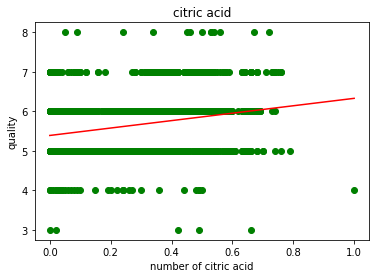

In [27]:
drawLinearRegression(df, "citric acid", "quality")

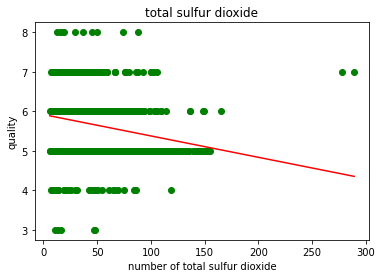

In [28]:
drawLinearRegression(df, "total sulfur dioxide", "quality")


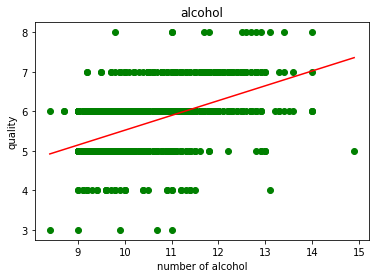

In [29]:
drawLinearRegression(df, "alcohol", "quality")


Từ đó ta xây được mô hình thông qua 3 đặc trưng: citric acid, total sulfur dioxide, alcohol

In [32]:
myMatrix = createMatrix(df, ["citric acid", "total sulfur dioxide", "alcohol",  None])
myResult = matrixResult(df, "quality")
my = LinearRegression(myMatrix, myResult)
a = round(my[0][0], 5)
b = round(my[1][0], 5)
c = round(my[2][0], 5)
d = round(my[3][0], 5)

print("y = ", end='')
print(a, '*x^3 +', b, '*x^2 +', c, '*x +', d)

y = 0.63694 *x^3 + -0.00331 *x^2 + 0.3361 *x + 2.14316
